<a href="https://colab.research.google.com/github/dohyeon-kim012/python-1./blob/main/Mini_project/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94_%EC%B2%AD%EB%85%84%20%EC%9E%90%EC%82%B4%EB%A5%A0%EA%B3%BC%20%EC%8B%A4%EC%97%85%EB%A5%A0%EC%9D%98%20%EA%B4%80%EA%B3%84%EC%84%B1%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 그래프 음수 표현
plt.rcParams['axes.unicode_minus'] = False 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. 사용한 데이터셋
1. 서울시 청년(**15~29세**) 고용지표 통계
http://data.seoul.go.kr/dataList/10785/S/2/datasetView.do
2. 서울시 자살률 (연령별) 통계
https://data.seoul.go.kr/dataList/10775/S/2/datasetView.do#

## 1-1. 표현하고자 하는 데이터
1. 연도별 15~29세(이하 청년) 실업률
2. 연도별 청년 자살률  
3. 기준이 되는 연도는 2009년 ~ 2019년으로 한정
- 공통 x축: 연도
- y축: 청년 실업률, 청년 자살률

In [ ]:
import pandas as pd

In [ ]:
# 서울시 2009~ 2019 청년 실업률
hire_file_path = '/content/drive/MyDrive/Colab Notebooks/python_AI/data/seoul_year_hire.txt'
seoul_hire = pd.read_csv(hire_file_path, sep='\t')
seoul_hire

,기간,구분,생산가능인구,경제활동인구,취업자,실업자,경제활동참가율(%),고용률(%),실업률(%)
0,2009,구분,"2,233","1,091","1,002",89,48.9,44.9,8.1
1,2010,구분,"2,175","1,050",962,88,48.3,44.2,8.4
2,2011,구분,"2,121","1,052",965,88,49.6,45.5,8.3
3,2012,구분,"2,053",983,901,82,47.9,43.9,8.3
4,2013,구분,"1,996",933,852,81,46.7,42.7,8.7
5,2014,구분,"1,956",936,839,97,47.9,42.9,10.4
6,2015,구분,"1,924",930,843,87,48.3,43.8,9.3
7,2016,구분,"1,907",948,850,97,49.7,44.6,10.3
8,2017,구분,"1,881",948,852,96,50.4,45.3,10.1
9,2018,구분,"1,850",949,853,96,51.3,46.1,10.1


In [ ]:
# 서울시 2009 ~ 2019 전체 연령별 자살률
death_file_path = '/content/drive/MyDrive/Colab Notebooks/python_AI/data/seoul_year_death.txt'
seoul_death = pd.read_csv(death_file_path, sep='\t')
seoul_death

,기간,연령,자살 사망자수(명),자살 사망자수(명).1,자살 사망자수(명).2,자살률(십만명당),자살률(십만명당).1,자살률(십만명당).2
0,기간,연령,계,남자,여자,계,남자,여자
1,2009,합계,"2,662","1,631","1,031",26.1,32.2,20
2,2009,0∼14세,9,3,6,1.5,0.9,2.1
3,2009,15~19세,68,43,25,10.2,12.3,8
4,2009,20~24세,134,62,72,19.6,18.2,21
...,...,...,...,...,...,...,...,...
198,2019,75~79세,113,87,26,39.7,67.9,16.6
199,2019,80~84세,96,62,34,57.6,93.1,33.9
200,2019,85~89세,40,26,14,53.8,109.2,27.7
201,2019,90세이상,20,8,12,58.7,98.2,46.3


# 2. 가설
> **실업률**이 높아진다면 **자살률**도 높아지는가?  
데이터셋 **청년 실업률**과 **전체 연령별 자살률**을 활용하므로  
**청년 실업률**에 맞춰 **청년 자살률**로 데이터 전처리를 하고  
데이터 시각화를 하여 **실업률**과 **자살률**의 연관성이 있는지 확인


# 3. 데이터 전처리

## 3-1. 자살률, 실업률 데이터프레임 컬럼명 변경

In [ ]:
seoul_death_columns = ['연도', '연령', '자살 사망자수', '남자 자살 사망자수', '여자 자살 사망자수', '자살률', '남자 자살률', '여자 자살률']
seoul_death.columns = seoul_death_columns

seoul_hire = seoul_hire.rename(columns={
    '기간': '연도',
    '실업률(%)': '실업률'
  }
)
seoul_hire

,연도,구분,생산가능인구,경제활동인구,취업자,실업자,경제활동참가율(%),고용률(%),실업률
0,2009,구분,"2,233","1,091","1,002",89,48.9,44.9,8.1
1,2010,구분,"2,175","1,050",962,88,48.3,44.2,8.4
2,2011,구분,"2,121","1,052",965,88,49.6,45.5,8.3
3,2012,구분,"2,053",983,901,82,47.9,43.9,8.3
4,2013,구분,"1,996",933,852,81,46.7,42.7,8.7
5,2014,구분,"1,956",936,839,97,47.9,42.9,10.4
6,2015,구분,"1,924",930,843,87,48.3,43.8,9.3
7,2016,구분,"1,907",948,850,97,49.7,44.6,10.3
8,2017,구분,"1,881",948,852,96,50.4,45.3,10.1
9,2018,구분,"1,850",949,853,96,51.3,46.1,10.1


## 3-2. 실업률 데이터프레임의 필요한 컬럼만 가져오기

In [ ]:
seoul_hire_year_mean = seoul_hire.loc[:, ['연도', '실업률']]
seoul_hire_year_mean

,연도,실업률
0,2009,8.1
1,2010,8.4
2,2011,8.3
3,2012,8.3
4,2013,8.7
5,2014,10.4
6,2015,9.3
7,2016,10.3
8,2017,10.1
9,2018,10.1


## 3-3. 자살률 데이터프레임의 필요한 컬럼만 가져오기

In [ ]:
seoul_death = seoul_death.loc[:, ['연도', '연령', '자살률']]
seoul_death

,연도,연령,자살률
0,기간,연령,계
1,2009,합계,26.1
2,2009,0∼14세,1.5
3,2009,15~19세,10.2
4,2009,20~24세,19.6
...,...,...,...
198,2019,75~79세,39.7
199,2019,80~84세,57.6
200,2019,85~89세,53.8
201,2019,90세이상,58.7


## 3-4. 자살률 데이터프레임의 불필요한 행을 삭제

In [ ]:
seoul_death = seoul_death.drop(labels=0, inplace=False)
seoul_death

,연도,연령,자살률
1,2009,합계,26.1
2,2009,0∼14세,1.5
3,2009,15~19세,10.2
4,2009,20~24세,19.6
5,2009,25~29세,25.1
...,...,...,...
198,2019,75~79세,39.7
199,2019,80~84세,57.6
200,2019,85~89세,53.8
201,2019,90세이상,58.7


## 3-5. 자살률 데이터프레임의 잘못된 데이터('-')를 포함한 행 삭제

In [ ]:
# 자살률의 '-'값을 찾아 인덱스를 가져온다.
idx_temp = seoul_death[seoul_death['자살률'] == '-'].index
# 자살률의 '-'값이 들어있는 행을 모두 삭제
seoul_death = seoul_death.drop(idx_temp)
seoul_death

,연도,연령,자살률
1,2009,합계,26.1
2,2009,0∼14세,1.5
3,2009,15~19세,10.2
4,2009,20~24세,19.6
5,2009,25~29세,25.1
...,...,...,...
197,2019,70~74세,32.4
198,2019,75~79세,39.7
199,2019,80~84세,57.6
200,2019,85~89세,53.8


## 3-6. 자살률 데이터타입 변경

In [ ]:
seoul_death['자살률'] = seoul_death['자살률'].astype('float')
seoul_death.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 1 to 201
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      198 non-null    object 
 1   연령      198 non-null    object 
 2   자살률     198 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.2+ KB


## 3-7. 자살률 데이터프레임을 실업률 데이터에 맞춰 가공
1. 연도별 **15~29세(이하 청년)** 실업률(기준)
2. 연도별 전체 연령대별 자살률 -> 연도별 **청년** 자살률

### 3-7-1. 연도별 청년 자살률 조건 마스크 생성

In [ ]:
# 청년 자살률의 조건 마스크 생성
age_mask = (seoul_death['연령'] == '15~19세') | (seoul_death['연령'] == '20~24세') | (seoul_death['연령'] == '25~29세')
age_mask

1      False
2      False
3       True
4       True
5       True
       ...  
197    False
198    False
199    False
200    False
201    False
Name: 연령, Length: 198, dtype: bool

### 3-7-2. 조건 색인을 이용해 청년 자살률 데이터 프레임 가져오기

In [ ]:
# 데이터 프레임에 조건색인으로 청년 자살률 데이터프레임 가져오기
seoul_death = seoul_death[age_mask]
seoul_death

,연도,연령,자살률
3,2009,15~19세,10.2
4,2009,20~24세,19.6
5,2009,25~29세,25.1
21,2010,15~19세,7.9
22,2010,20~24세,18.1
23,2010,25~29세,23.7
40,2011,15~19세,8.3
41,2011,20~24세,14.9
42,2011,25~29세,27.8
58,2012,15~19세,7.9


## 3-8.연도별 청년 자살률 구하기

### 3-8-1. 연도별 그룹묶어 청년의 자살률 평균을 구하기

In [ ]:
seoul_death_year_mean_temp = seoul_death.groupby('연도')['자살률'].mean()
# seoul_death_year_mean_temp.index
# seoul_death_year_mean_temp.values
seoul_death_year_mean = pd.DataFrame(seoul_death_year_mean_temp.index)
seoul_death_year_mean['자살률'] = seoul_death_year_mean_temp.values.round(1)
seoul_death_year_mean

,연도,자살률
0,2009,18.3
1,2010,16.6
2,2011,17.0
3,2012,13.0
4,2013,15.3
5,2014,13.7
6,2015,11.7
7,2016,14.0
8,2017,12.2
9,2018,13.8


## 3-9. 전처리 데이터 확인

### 3-9-1. 연도별 청년 실업률

In [ ]:
# 연도별 청년 실업률 데이터프레임
seoul_hire_year_mean

,연도,실업률
0,2009,8.1
1,2010,8.4
2,2011,8.3
3,2012,8.3
4,2013,8.7
5,2014,10.4
6,2015,9.3
7,2016,10.3
8,2017,10.1
9,2018,10.1


### 3-9-2. 연도별 청년 자살률

In [ ]:
# 연도별 청년 자살률 데이터프레임
seoul_death_year_mean

,연도,자살률
0,2009,18.3
1,2010,16.6
2,2011,17.0
3,2012,13.0
4,2013,15.3
5,2014,13.7
6,2015,11.7
7,2016,14.0
8,2017,12.2
9,2018,13.8


# 4. 데이터 시각화

## 4-1. 캔버스 크기와 변수설정

In [ ]:
import matplotlib.pyplot as plt
# 앞으로 사용할 캔버스의 기본 크기를 지정
plt.rcParams['figure.figsize'] = (8, 5)

In [ ]:
# y축 실업률
y_hire = seoul_hire_year_mean['실업률']
# y축 자살률
y_death = seoul_death_year_mean['자살률']
# 공통 x축 연도
xlabels = seoul_hire_year_mean['연도']
# 실업률과 자살률 컬러
colors = ['#ac66cc', '#eba83a']
# 실업률과 자살률 라벨(범례)
labels = ['실업률', '자살률']

## 4-2. 서브플롯을 이용해 다중 바 그래프 그리기

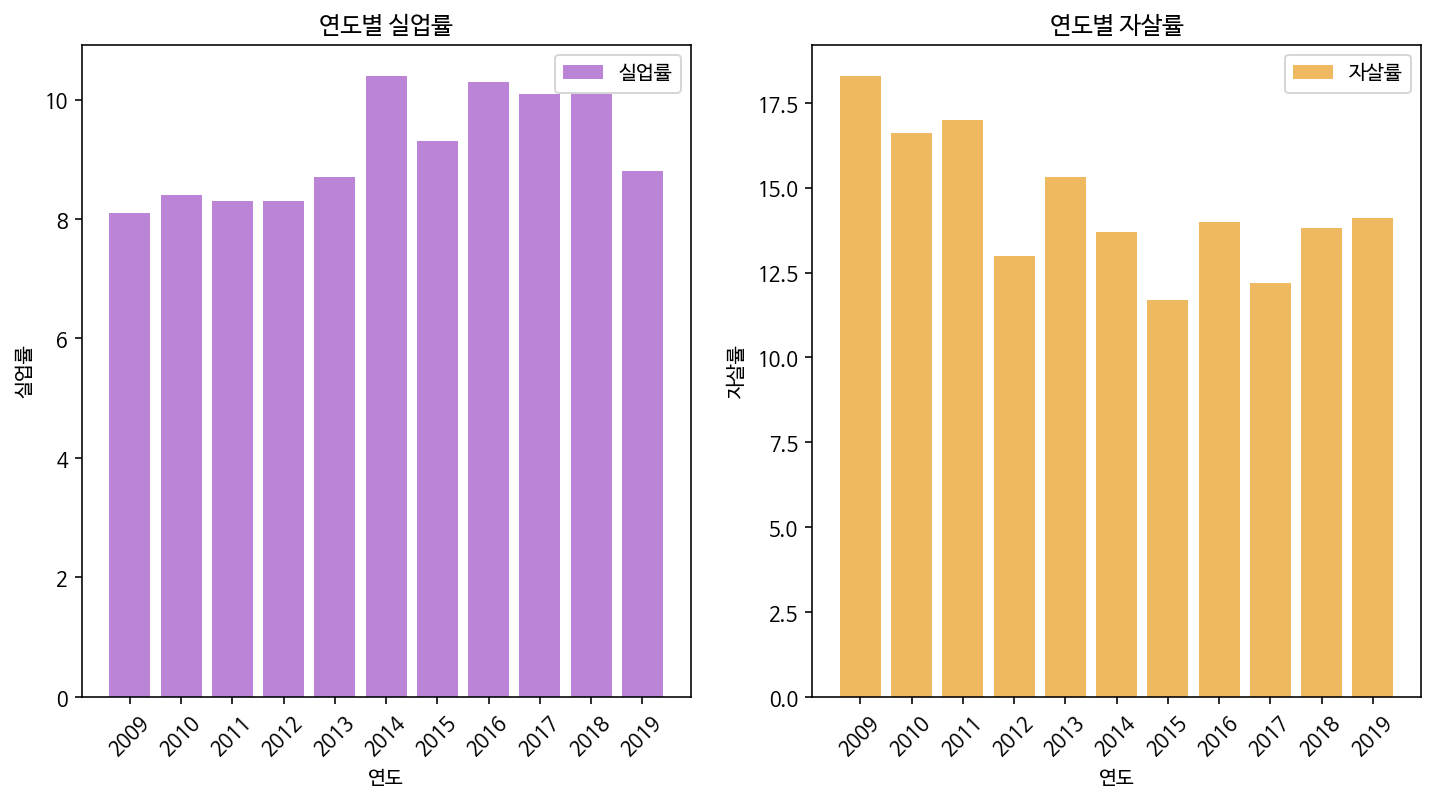

In [ ]:
# 현재 사용할 캔버스 크기 조절하기
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(xlabels, y_hire, color=colors[0], label=labels[0], alpha=.8)
plt.xticks(xlabels, rotation=45)
plt.xlabel('연도')
plt.ylabel(labels[0])
plt.title('연도별 실업률')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(xlabels, y_death, color=colors[1], label=labels[1], alpha=.8)
plt.xticks(xlabels, rotation=45)
plt.xlabel('연도')
plt.ylabel(labels[1])
plt.title('연도별 자살률')
plt.legend()
plt.show()

## 4-3. 바 비교 그래프 그리기

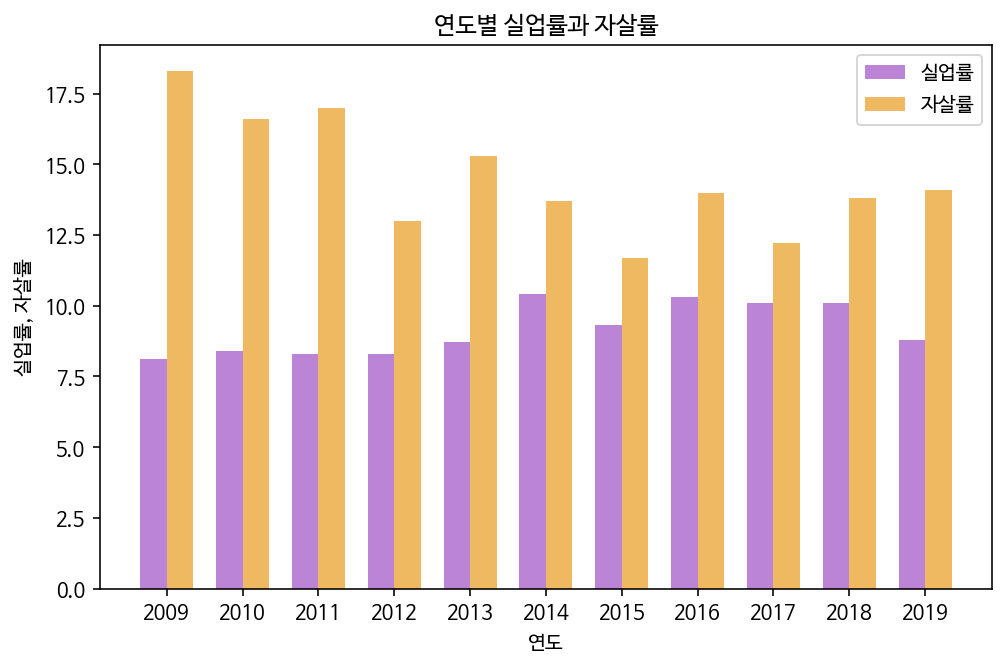

In [ ]:
y_1 = y_death
y_2 = y_hire

fig, axes = plt.subplots()

width = 0.35

axes.bar(xlabels - width/2, y_2, width, align='center', alpha=0.8, label=labels[0], color=colors[0])
axes.bar(xlabels + width/2, y_1, width, align='center', alpha=0.8, label=labels[1], color=colors[1])

plt.xlabel('연도')
plt.ylabel('실업률, 자살률')
plt.xticks(xlabels)
plt.title('연도별 실업률과 자살률')
plt.legend()

plt.show()

## 4-4. 플롯 비교 그래프 그리기

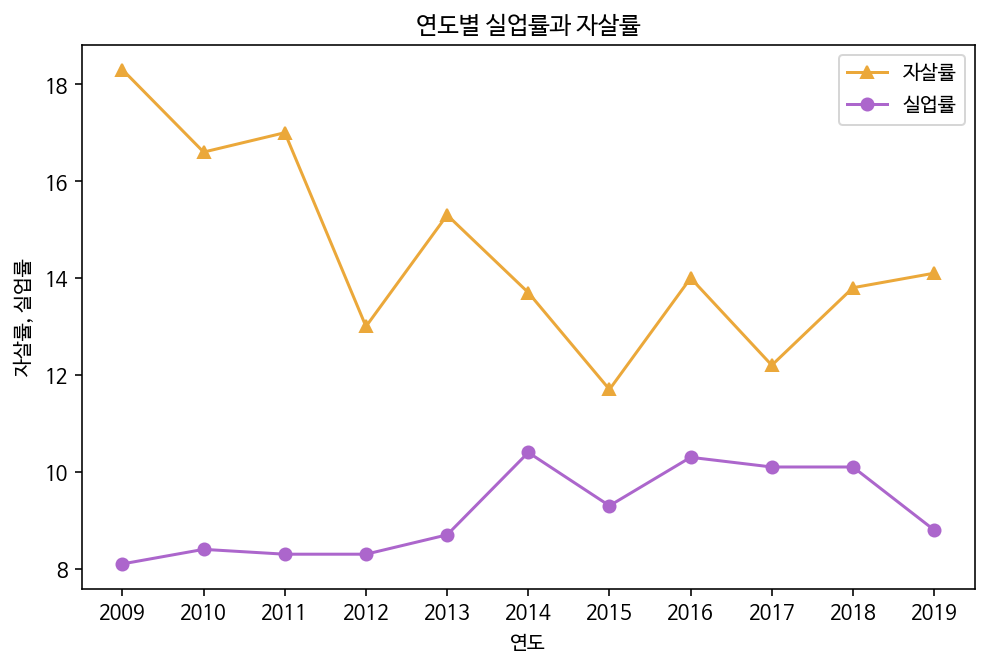

In [ ]:

plt.plot(xlabels, y_death, color=colors[1],label=labels[1], marker='^')
plt.plot(xlabels, y_hire, color=colors[0],label=labels[0], marker='o')
plt.xlabel('연도')
plt.ylabel('자살률, 실업률')
plt.xticks(xlabels)
plt.title('연도별 실업률과 자살률')
plt.legend()
plt.show()

# 5. 도출된 인사이트
> 두 개의 데이터 셋을 분석해 본 결과, **예상**했던 바와는 **다른 결과**가 나옴  
실업률이 높아지더라도 자살률이 오히려 줄어든 연도도 있었음  
따라서, **자살률과 실업률은 큰 상관이 없고**, 팀의 가설이 틀렸다는 결과를 얻었음